In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sb  
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
dataset = pd.read_csv("Artificial_Intelligence_Assignment_06_dataset_insurance_pre.csv")

In [3]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [6]:
independent = dataset[['age','bmi','children','sex_male', 'smoker_yes']]

In [7]:
dependent = dataset[['charges']]

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,train_size=0.70,random_state=0) 

In [10]:
#Model creation for Decision Tree Regressor_Regression_with_GSCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {'booster': ['gbtree', 'dart'],  # 'gblinear' for linear models
    'verbosity': [0, 1],            # 0=silent, 1=warning
    'nthread': [-1],                # Use all threads
    'disable_default_eval_metric': [0],

    # ========== Tree Booster Parameters ==========
    'eta': [0.01, 0.1, 0.3],       # Learning rate
    'gamma': [0, 0.1, 1],          # Min split loss
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'max_delta_step': [0, 1],      # Useful for imbalanced regression
    #'subsample': [0.6, 0.8, 1.0],  # Row sampling
    #'colsample_bytree': [0.6, 0.8, 1.0],
    #'colsample_bylevel': [0.6, 0.8, 1.0],
    #'colsample_bynode': [0.6, 0.8, 1.0],
    #'lambda': [0, 0.1, 1],         # L2 regularization
    #'alpha': [0, 0.1, 1],          # L1 regularization
    #'tree_method': ['auto', 'hist', 'exact'],
    #'sketch_eps': [0.03],          # For approx tree_method
    #'scale_pos_weight': [1],       # For imbalanced data
    #'grow_policy': ['depthwise', 'lossguide'],
    #'max_leaves': [0, 32, 64],     # Only for lossguide
    #'max_bin': [256],              # For hist tree_method
    #'predictor': ['auto', 'cpu_predictor', 'gpu_predictor'],
    #'num_parallel_tree': [1],      # For random forest

    # ========== Dart Booster Parameters ==========
    #'sample_type': ['uniform', 'weighted'],
    #'normalize_type': ['tree', 'forest'],
    #'rate_drop': [0.0, 0.1],      # Dropout rate
    #'one_drop': [0, 1],            # Force at least one dropout
    #'skip_drop': [0.0, 0.1],       # Skip dropout probability

    # ========== Learning Task Parameters ==========
    'objective': ['reg:squarederror'],
    'base_score': [0.5],
    'eval_metric': ['rmse', 'mae'],
    'seed': [42]
    }

grid = GridSearchCV(XGBRegressor(), param_grid, refit=True, verbose=3,n_jobs=-1)

#fitting the model for gridsearchcv

grid.fit(x_train, y_train) 

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    lear...
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.5], 'booster': ['gbtree', 'dart'],
                         'disable_default_eval_metric': [0],
                         'eta': [0.01, 0.1, 0.3],
                         'eval_metric': ['rmse', 'mae'], 'gamma': [0, 0.1, 1],
                         'max_delta_step': [0, 1], 'max_depth': [3, 6, 9],
                         'min_child_weight': [1, 5, 10], 'nthread': [-1],
                         'objective': ['reg:squarederror'], 'seed': [42],
                         'verbosity': [0, 1]},
             verbose=3)

In [11]:
#print best parameter after tuning
#print(grid.best_params_)
re = grid.cv_results_

print("The R_Score value for best parameter {}:".format(grid.best_params_))

The R_Score value for best parameter {'base_score': 0.5, 'booster': 'gbtree', 'disable_default_eval_metric': 0, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 10, 'nthread': -1, 'objective': 'reg:squarederror', 'seed': 42, 'verbosity': 0}:


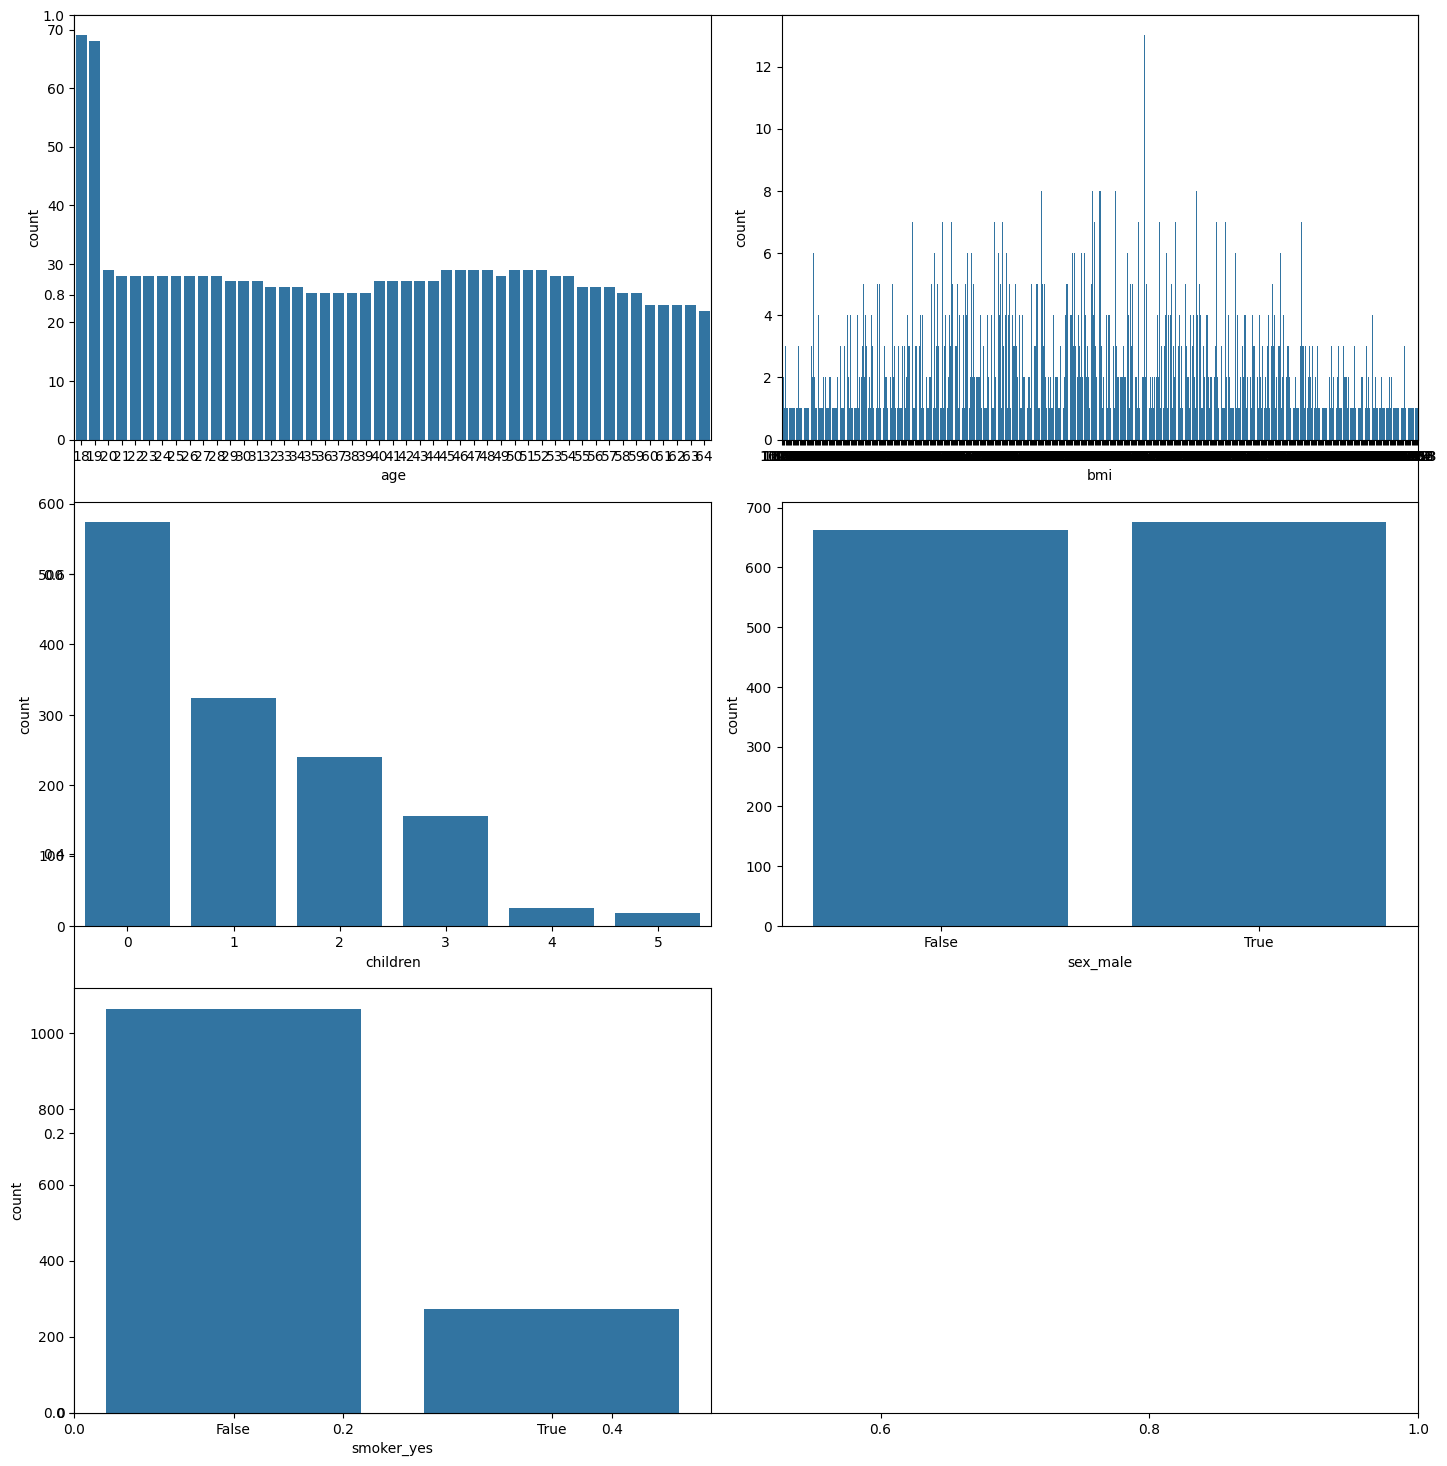

In [12]:
# Set the figure size for the subplots
plt.subplots(figsize=(15, 15))

# Define the list of columns to visualize
sample = ['age', 'bmi',	'children',	'sex_male', 'smoker_yes']

# Loop through the specified columns
for i, col in enumerate(sample):
    # Create subplots in a 3x2 grid
    plt.subplot(3, 2, i + 1)
    
    # Create a countplot for the current column
    sb.countplot(data=dataset, x=col)
    
# Adjust subplot layout for better presentation
plt.tight_layout()

# Display the subplots
plt.show()


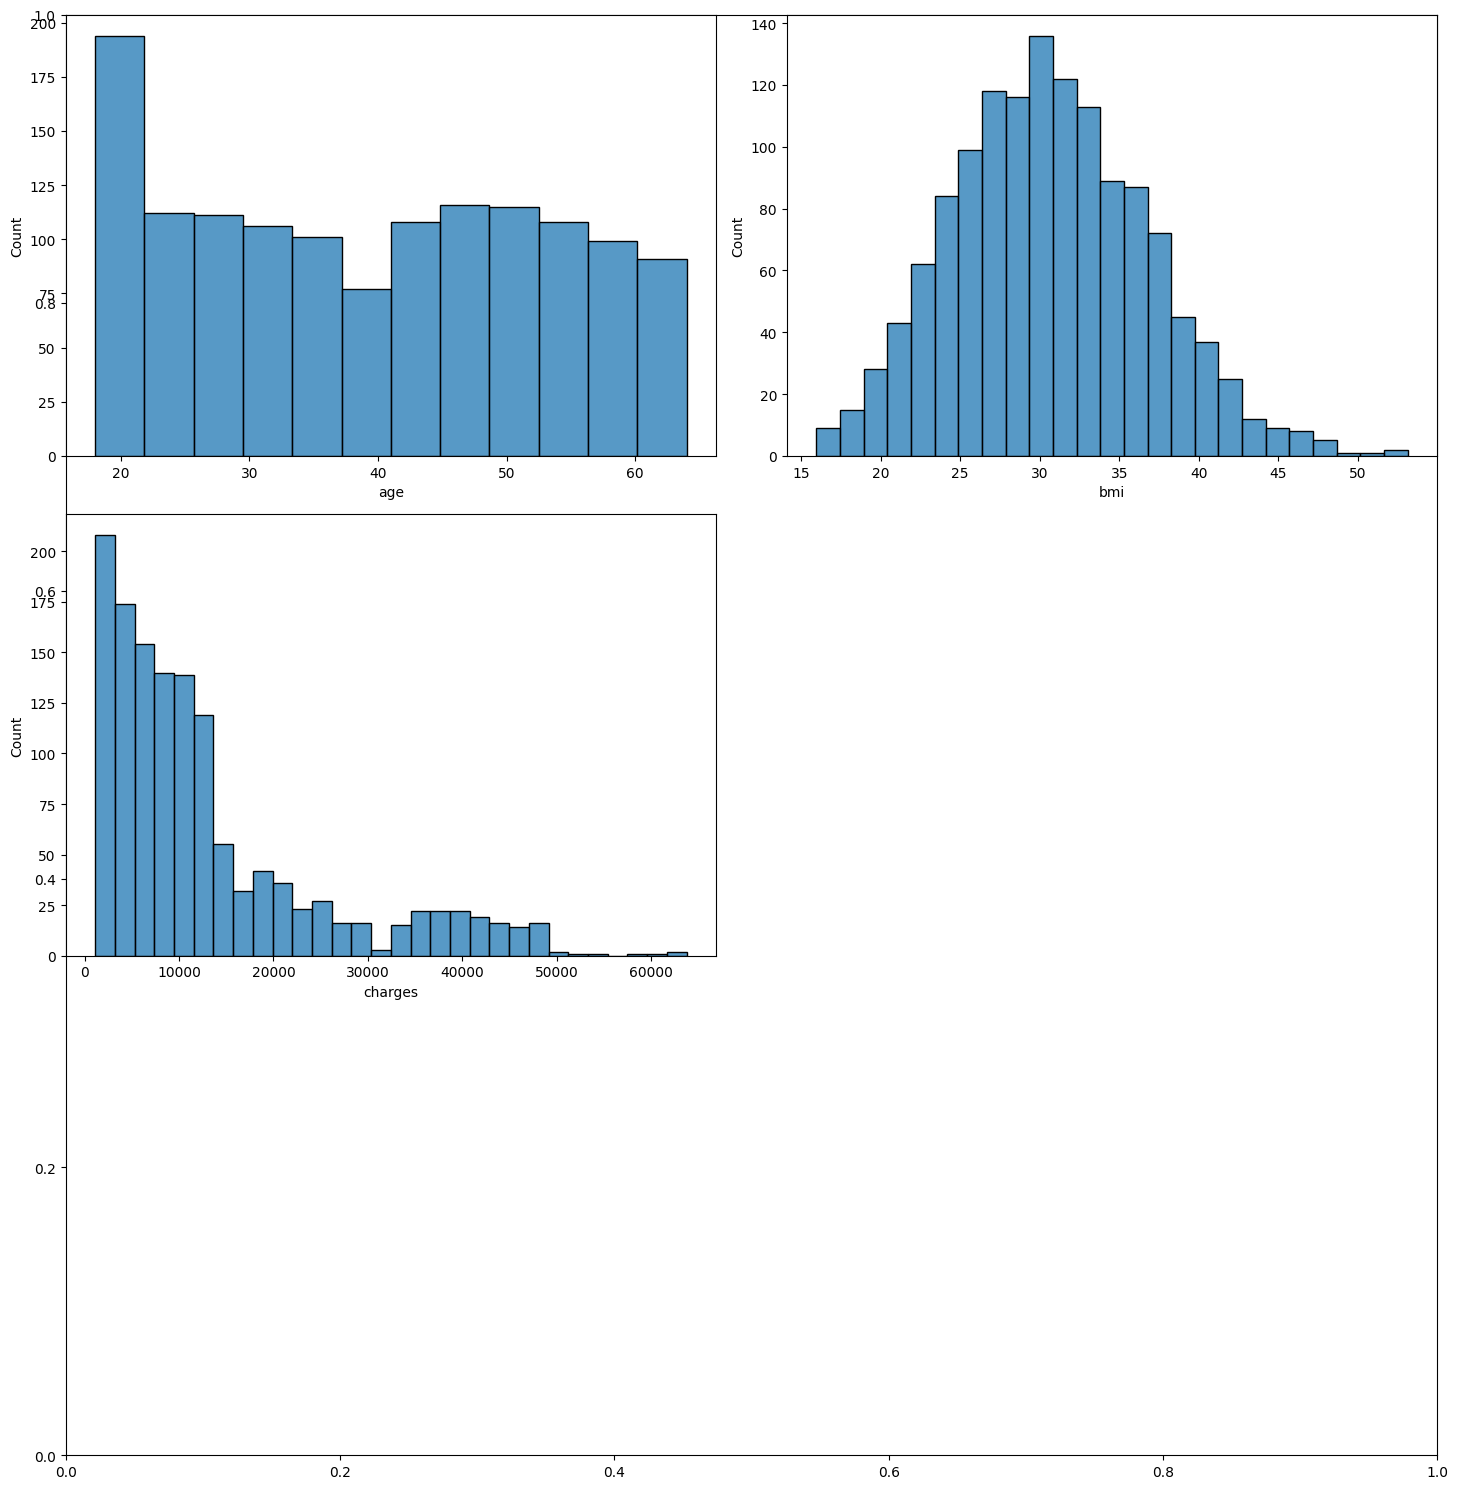

In [13]:
# Set the figure size for the subplots
plt.subplots(figsize=(15, 15))

# Define the list of numeric columns to visualize
sample = ['age', 'bmi', 'charges']

# Loop through the specified columns
for i, col in enumerate(sample):
    # Create subplots in a 3x2 grid
    plt.subplot(3, 2, i + 1)
    
    # Create a distribution plot for the current numeric column
    sb.histplot(dataset[col])
    
# Adjust subplot layout for better presentation
plt.tight_layout()

# Display the subplots
plt.show()


In [14]:
table=pd.DataFrame.from_dict(re)

In [15]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_score,param_booster,param_disable_default_eval_metric,param_eta,param_eval_metric,param_gamma,...,param_verbosity,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066028,0.003368,0.008341,0.000795,0.5,gbtree,0,0.01,rmse,0.0,...,0,"{'base_score': 0.5, 'booster': 'gbtree', 'disa...",0.631285,0.547601,0.541587,0.527384,0.477466,0.545065,0.049668,457
1,0.063180,0.003359,0.007821,0.000626,0.5,gbtree,0,0.01,rmse,0.0,...,1,"{'base_score': 0.5, 'booster': 'gbtree', 'disa...",0.631285,0.547601,0.541587,0.527384,0.477466,0.545065,0.049668,457
2,0.063650,0.004056,0.008528,0.001300,0.5,gbtree,0,0.01,rmse,0.0,...,0,"{'base_score': 0.5, 'booster': 'gbtree', 'disa...",0.631285,0.547601,0.541587,0.527384,0.477466,0.545065,0.049668,457
3,0.058116,0.004683,0.008530,0.001238,0.5,gbtree,0,0.01,rmse,0.0,...,1,"{'base_score': 0.5, 'booster': 'gbtree', 'disa...",0.631285,0.547601,0.541587,0.527384,0.477466,0.545065,0.049668,457
4,0.056681,0.003713,0.006725,0.000396,0.5,gbtree,0,0.01,rmse,0.0,...,0,"{'base_score': 0.5, 'booster': 'gbtree', 'disa...",0.631285,0.547668,0.541587,0.527384,0.477466,0.545078,0.049669,433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,0.628860,0.036829,0.009196,0.000352,0.5,dart,0,0.30,mae,1.0,...,1,"{'base_score': 0.5, 'booster': 'dart', 'disabl...",-1.188820,-1.130267,-1.273140,-1.452540,-1.225833,-1.254120,0.109669,649
1292,0.620783,0.014109,0.008818,0.000510,0.5,dart,0,0.30,mae,1.0,...,0,"{'base_score': 0.5, 'booster': 'dart', 'disabl...",-1.188820,-1.130267,-1.273140,-1.452540,-1.225833,-1.254120,0.109669,649
1293,0.625475,0.036397,0.009899,0.000871,0.5,dart,0,0.30,mae,1.0,...,1,"{'base_score': 0.5, 'booster': 'dart', 'disabl...",-1.188820,-1.130267,-1.273140,-1.452540,-1.225833,-1.254120,0.109669,649
1294,0.640921,0.045665,0.011058,0.002034,0.5,dart,0,0.30,mae,1.0,...,0,"{'base_score': 0.5, 'booster': 'dart', 'disabl...",-1.188820,-1.130267,-1.273140,-1.452540,-1.225833,-1.254120,0.109669,649


In [16]:
table.to_csv("best_parameters.csv", index=False)

In [17]:
#from reportlab.lib.pagesizes import letter
#from reportlab.pdfgen import canvas

# Sample DataFrame
#data = {'Parameter': ['max_depth', 'min_samples_split', 'min_samples_leaf'],
 #       'Best Value': [10, 2, 1]}
#table = pd.DataFrame(data)

# Function to convert DataFrame to PDF
#def table_to_pdf(table, filename="output.pdf"):
 #   c = canvas.Canvas(filename, pagesize=letter)
  #  width, height = letter
   # c.setFont("Helvetica", 10)

#    x_offset = 50
 #   y_offset = height - 50
  #  line_height = 20
#
   # Draw column headers
   # for col_index, col_name in enumerate(table.columns):
 #       c.drawString(x_offset + col_index * 100, y_offset, col_name)

  #  y_offset -= line_height

    # Draw table rows
   # for row in table.itertuples(index=False):
    #    for col_index, value in enumerate(row):
     #       c.drawString(x_offset + col_index * 100, y_offset, str(value))
      #  y_offset -= line_height

#        if y_offset < 50:  # Start a new page if needed
 #           c.showPage()
  #          y_offset = height - 50

   # c.save()
    #print(f"PDF saved as {filename}")

# Convert DataFrame to PDF
#table_to_pdf(table, "best_parameters.pdf")



In [18]:
y_pred=grid.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [20]:
r_score

0.8898589611053467

In [21]:
import pickle

In [22]:
mymodel= ("XG_boost regressor Insurance.sav")

In [23]:
pickle.dump(grid,open(mymodel,'wb'))